In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sopt
import scipy.stats as stats
from scipy.stats import anderson

In [2]:
datos=pd.read_excel('Datos.xlsx')

In [3]:
datos=datos.dropna()

In [4]:
datos.head()

,Datos destilación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
2,"Volumen evaporado, %","tiempo, s","Temperatura de destilación, °C","Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,375,26.6,Primera gota,376,29.6,Primera gota,379,28.4,Primera gota,375,30.8
4,5,460,43.5,5,458,45.8,5,459,44.3,5,465,47.4
5,10,529.7,50.2,10,529.4,52.6,10,530.4,51,10,536.4,52.3
6,15,599.5,55.7,15,599.1,58,15,601.8,56.8,15,607.8,58.3


In [5]:
datosCorrida2=pd.concat([datos['Unnamed: 3'],datos['Unnamed: 4'],datos['Unnamed: 5']],axis=1)
datosCorrida2=pd.concat([pd.DataFrame({'Unnamed: 3':[0],'Unnamed: 4':[0],'Unnamed: 5':[15]}),datosCorrida2])

In [6]:
datosCorrida2.head()

,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,0,15
2,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,376,29.6
4,5,458,45.8
5,10,529.4,52.6


In [7]:
datosCorrida2.columns=datosCorrida2.iloc[1]

In [8]:
datosCorrida2=datosCorrida2.drop(2,axis=0)

In [9]:
datosCorrida2.index=[i for i in range(len(datosCorrida2))]

In [10]:
datosCorrida2.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,0,0,15
1,Primera gota,376,29.6
2,5,458,45.8
3,10,529.4,52.6
4,15,599.1,58


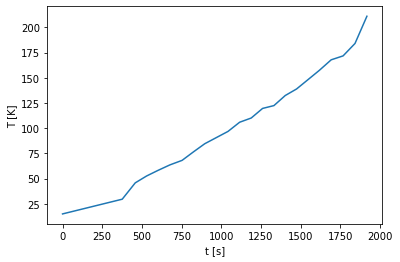

In [11]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Temperatura de destilación'])
plt.xlabel('t [s]')
plt.ylabel('T [K]')
plt.show()

In [12]:
datosCorrida2['Volumen evaporado, %'][1]=0.1

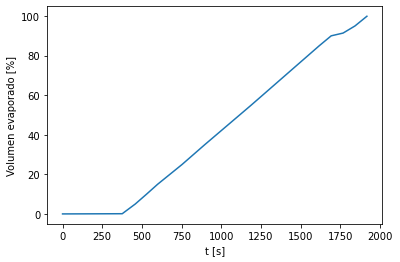

In [13]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('t [s]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

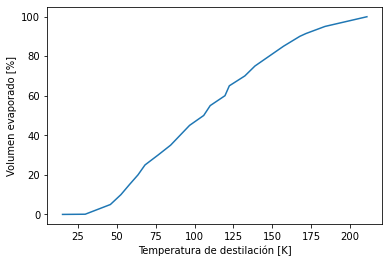

In [14]:
plt.plot(datosCorrida2['Temperatura de destilación'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('Temperatura de destilación [K]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

# Modelos empíricos

Para los tres modelos empíricos que se presentan a continuación se tomó en cuenta que debía quedar un coeficiente que no fuera dependiente del tiempo, este debe ser lo más cercano a $15$, de forma que se cumpla que $T(t)=15$.

## Polinómico

Para la temperatura como función del tiempo, se observa que existe cierta linealidad; sin embargo, podría expandirse un polinomio de grado mayor, lo que permitiría aumentar el ajuste, de esta forma, se escoge un polinomio de ajuste de la forma:

$$T(t)=At^4+Bt^3+Ct^2+Dt+E$$

In [15]:
tiempo,temperatura=np.asarray(datosCorrida2['tiempo']).astype('float64'),np.asarray(datosCorrida2['Temperatura de destilación']).astype('float64')

In [16]:
def TPolinomio(t,A,B,C,D,E):
    return A*t**4+B*t**3+C*t**2+D*t+E

In [17]:
coefsP,covP=sopt.curve_fit(TPolinomio,tiempo,temperatura)
ajusTPoli=TPolinomio(tiempo,coefsP[0],coefsP[1],coefsP[2],coefsP[3],coefsP[4])
residuosEmpíricoPoli=ajusTPoli-temperatura

In [18]:
coefsP

array([ 3.71460249e-11, -1.34816405e-07,  1.70170679e-04,  7.03830094e-03,
        1.47599678e+01])

In [19]:
desvEstP=(residuosEmpíricoPoli**2).sum()/(len(residuosEmpíricoPoli)-1)
desvEstP

8.700446619889185

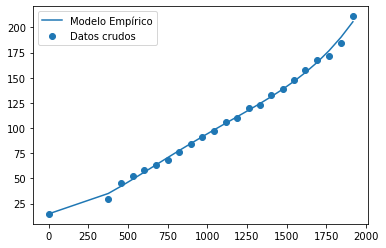

In [20]:
plt.plot(tiempo,ajusTPoli)
plt.scatter(tiempo,temperatura)
plt.legend(['Modelo Empírico','Datos crudos'])
plt.show()

### Diagnósticos de los residuos para el modelo polinómico

#### Prueba de normalidad

Se observa que el coeficiente de Anderson-Darling calculado es menor al valor teórico con un $95\%$ de confianza, por lo que se acepta la normalidad de los residuos.

In [21]:
anderson(residuosEmpíricoPoli).statistic,anderson(residuosEmpíricoPoli).critical_values[2]

(0.3643323243466412, 0.699)

#### Gráficas de residuos

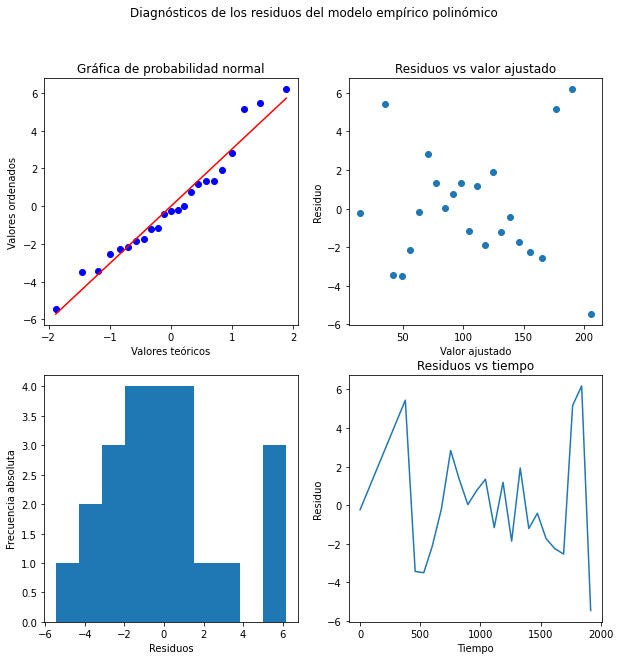

In [22]:
fig1,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosEmpíricoPoli,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTPoli,residuosEmpíricoPoli)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoPoli)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosEmpíricoPoli)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig1.suptitle('Diagnósticos de los residuos del modelo empírico polinómico')
plt.show()

## Hiperbólico-cuadrático

Ahora, se prueba realizar el mismo ajuste de los datos pero con un modelo de la forma:

$$T(t)=\frac{At^2}{B+Ct}+D$$

In [23]:
def THiperbólico(t,A,B,C,D):
    return A*t**2/(B+C*t)+D

In [24]:
coefsH,covH=sopt.curve_fit(THiperbólico,tiempo,temperatura)
ajusTH=THiperbólico(tiempo,coefsH[0],coefsH[1],coefsH[2],coefsH[3])
residuosEmpíricoH=ajusTH-temperatura

In [25]:
coefsH

array([3.86201953e+01, 2.20033281e+05, 3.08999307e+02, 1.94730692e+01])

In [26]:
desvEstH=(residuosEmpíricoH**2).sum()/(len(residuosEmpíricoH)-1)
desvEstH

24.56902333044751

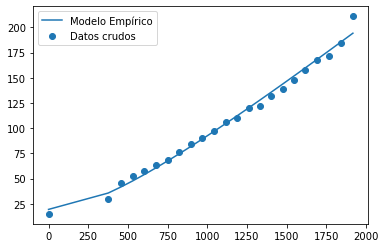

In [27]:
plt.plot(tiempo,ajusTH)
plt.scatter(tiempo,temperatura)
plt.legend(['Modelo Empírico','Datos crudos'])
plt.show()

### Diagnósticos de los residuos para el modelo hiperbólico-cuadrático

#### Prueba de normalidad

Se observa que el coeficiente de Anderson-Darling calculado es menor al valor teórico con un $95\%$ de confianza, por lo que se acepta la normalidad de los residuos.

In [28]:
anderson(residuosEmpíricoH).statistic,anderson(residuosEmpíricoH).critical_values[2]

(0.6625595104903219, 0.699)

#### Gráficas de residuos

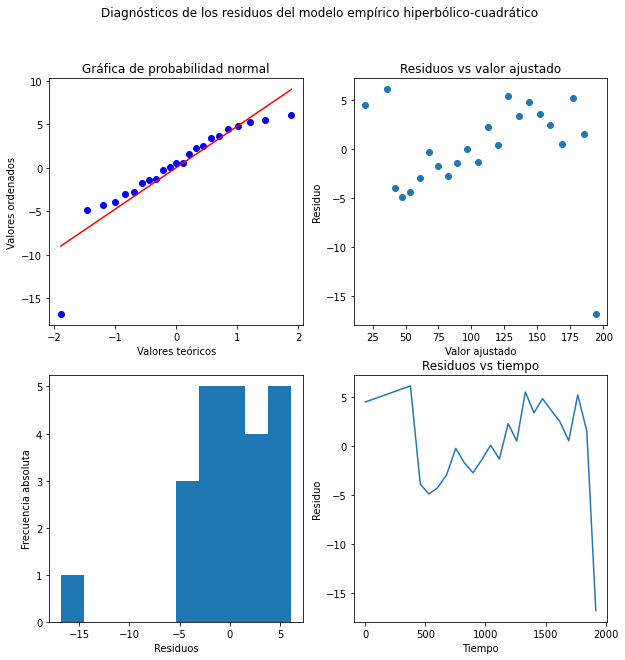

In [29]:
fig2,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosEmpíricoH,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTH,residuosEmpíricoH)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoH)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosEmpíricoH)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig2.suptitle('Diagnósticos de los residuos del modelo empírico hiperbólico-cuadrático')
plt.show()

## Potencial

Ahora, se prueba realizar el mismo ajuste de los datos pero con un modelo de la forma:

$$T(t)=At^{B}+C$$

In [30]:
def TPotencial(t,A,B,C):
    return A*t**B+C

In [31]:
coefsPot,covPot=sopt.curve_fit(TPotencial,tiempo,temperatura)
ajusTPot=TPotencial(tiempo,coefsPot[0],coefsPot[1],coefsPot[2])
residuosEmpíricoPot=ajusTPot-temperatura

In [32]:
coefsPot

array([7.21107796e-03, 1.33884814e+00, 1.69877673e+01])

In [33]:
desvEstPot=(residuosEmpíricoPot**2).sum()/(len(residuosEmpíricoPot)-1)
desvEstPot

20.107534040704255

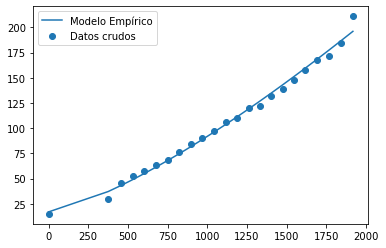

In [34]:
plt.plot(tiempo,ajusTPot)
plt.scatter(tiempo,temperatura)
plt.legend(['Modelo Empírico','Datos crudos'])
plt.show()

### Diagnósticos de los residuos para el modelo empírico

#### Prueba de normalidad

Se observa que el coeficiente de Anderson-Darling calculado es menor al valor teórico con un $95\%$ de confianza, por lo que se acepta la normalidad de los residuos.

In [35]:
anderson(residuosEmpíricoPot).statistic,anderson(residuosEmpíricoPot).critical_values[2]

(0.6576915668435639, 0.699)

#### Gráficas de residuos

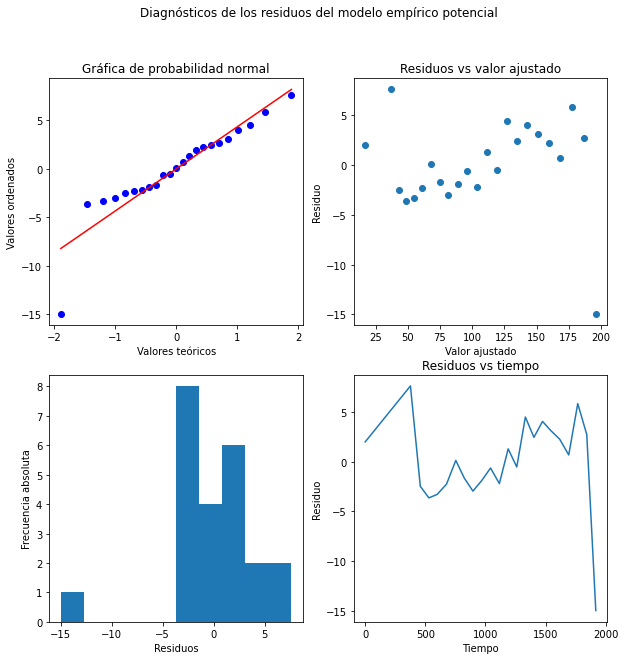

In [36]:
fig3,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosEmpíricoPot,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTPot,residuosEmpíricoPot)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoPot)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosEmpíricoPot)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig3.suptitle('Diagnósticos de los residuos del modelo empírico potencial')
plt.show()

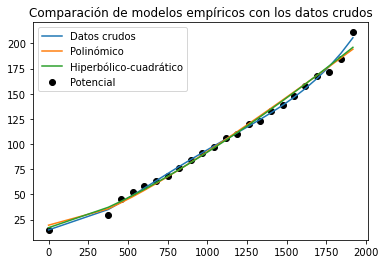

In [37]:
plt.scatter(tiempo,temperatura,color='black')
plt.plot(tiempo,ajusTPoli)
plt.plot(tiempo,ajusTH)
plt.plot(tiempo,ajusTPot)
plt.legend(['Datos crudos','Polinómico','Hiperbólico-cuadrático','Potencial'])
plt.title('Comparación de modelos empíricos con los datos crudos')
plt.show()

# Modelo teórico

## Balance de masa

Se define como volumen de control la muestra de hidrocarburos, se tiene entonces que:

$$V_{A}=F_{E}-F_{S}+V_{G}-V_{C}$$

* Velocidad de acumulación, $V_{A}=0$
* Flujo de entrada, $F_{E}=R$
* Flujo de salida, $F_{S}=S$
* Velocidad de generación, $V_{G}=0$
* Velocidad de consumo, $V_{C}=0$